In [190]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [191]:
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [192]:
X, y = make_circles(n_samples = 100, noise = 0.05, random_state = 1)

[]

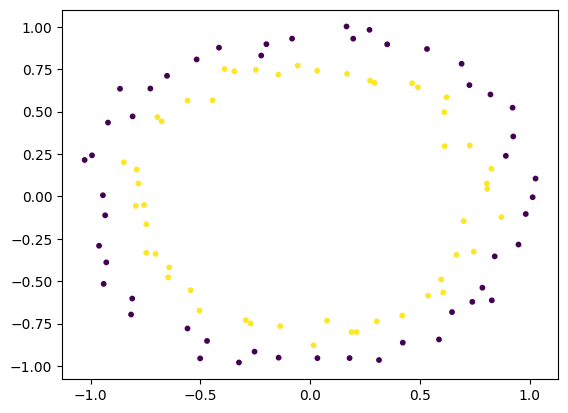

In [193]:
plt.scatter(X[:,0], X[:,1], c=y,s=10)
plt.plot()

In [194]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [195]:
import torch
import torch.nn as nn

In [196]:
model = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 256),
    nn.ReLU(),
    nn.Linear(in_features = 256, out_features = 1),
    nn.Sigmoid()
)
model

Sequential(
  (0): Linear(in_features=2, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=1, bias=True)
  (3): Sigmoid()
)

In [197]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [198]:
train_losses = []
test_losses = []

In [199]:
epochs = 1000
for i in range(epochs):
    model.train()
    output = torch.squeeze(model(X_train), dim=1)
    train_loss = criterion(output, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    # Store train loss
    train_losses.append(train_loss.item())    
    
    model.eval()
    with torch.inference_mode():
        test_pred = torch.squeeze(model(X_test), dim=1)
        test_loss = criterion(test_pred, y_test)
    test_losses.append(test_loss.item())
    print(f'Epoch [{i+1}/1000], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


    

Epoch [1/1000], Train Loss: 0.7259, Test Loss: 0.7336
Epoch [2/1000], Train Loss: 0.6801, Test Loss: 0.8224
Epoch [3/1000], Train Loss: 0.6939, Test Loss: 0.8267
Epoch [4/1000], Train Loss: 0.6895, Test Loss: 0.7817
Epoch [5/1000], Train Loss: 0.6701, Test Loss: 0.7266
Epoch [6/1000], Train Loss: 0.6535, Test Loss: 0.6834
Epoch [7/1000], Train Loss: 0.6468, Test Loss: 0.6587
Epoch [8/1000], Train Loss: 0.6445, Test Loss: 0.6493
Epoch [9/1000], Train Loss: 0.6381, Test Loss: 0.6519
Epoch [10/1000], Train Loss: 0.6261, Test Loss: 0.6654
Epoch [11/1000], Train Loss: 0.6132, Test Loss: 0.6869
Epoch [12/1000], Train Loss: 0.6040, Test Loss: 0.7082
Epoch [13/1000], Train Loss: 0.5987, Test Loss: 0.7186
Epoch [14/1000], Train Loss: 0.5932, Test Loss: 0.7123
Epoch [15/1000], Train Loss: 0.5842, Test Loss: 0.6915
Epoch [16/1000], Train Loss: 0.5723, Test Loss: 0.6636
Epoch [17/1000], Train Loss: 0.5606, Test Loss: 0.6369
Epoch [18/1000], Train Loss: 0.5512, Test Loss: 0.6172
Epoch [19/1000], Tr

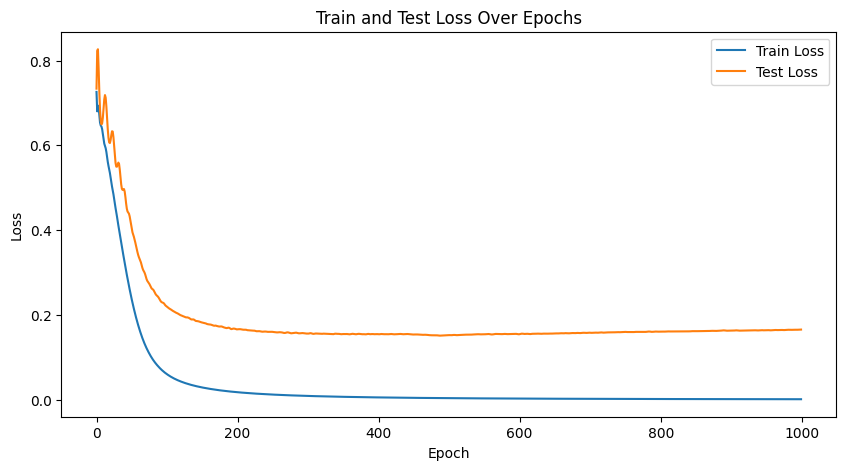

In [200]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Epochs')
plt.legend()
plt.show()

In [201]:
# Lets implement Early Stopping

In [202]:

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [203]:

early_stopping = EarlyStopping(verbose=True)

In [204]:
model1 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 256),
    nn.ReLU(),
    nn.Linear(in_features = 256, out_features = 1),
    nn.Sigmoid()
)
model1

Sequential(
  (0): Linear(in_features=2, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=1, bias=True)
  (3): Sigmoid()
)

In [205]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr = 0.01)

In [206]:
epochs = 1000
train_losses = []
test_losses = []
avg_train_losses = []
avg_test_losses = []
for i in range(epochs):
    
    model1.train()
    output = torch.squeeze(model1(X_train), dim=1)
    train_loss = criterion(output, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    # Store train loss
    train_losses.append(train_loss.item())    
    
    model.eval()
    with torch.inference_mode():
        test_pred = torch.squeeze(model1(X_test), dim=1)
        test_loss = criterion(test_pred, y_test)
        early_stopping(test_loss, model1)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
    test_losses.append(test_loss.item())
    print(f'Epoch [{i+1}/1000], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

train_loss = np.average(train_losses)
valid_loss = np.average(test_losses)
avg_train_losses.append(train_loss)
avg_test_losses.append(valid_loss)

Validation loss decreased (inf --> 0.748709).  Saving model ...
Epoch [1/1000], Train Loss: 0.7071, Test Loss: 0.7487
EarlyStopping counter: 1 out of 7
Epoch [2/1000], Train Loss: 0.6837, Test Loss: 0.7909
EarlyStopping counter: 2 out of 7
Epoch [3/1000], Train Loss: 0.6852, Test Loss: 0.7731
Validation loss decreased (0.748709 --> 0.734682).  Saving model ...
Epoch [4/1000], Train Loss: 0.6711, Test Loss: 0.7347
Validation loss decreased (0.734682 --> 0.700250).  Saving model ...
Epoch [5/1000], Train Loss: 0.6562, Test Loss: 0.7003
Validation loss decreased (0.700250 --> 0.679104).  Saving model ...
Epoch [6/1000], Train Loss: 0.6486, Test Loss: 0.6791
Validation loss decreased (0.679104 --> 0.670671).  Saving model ...
Epoch [7/1000], Train Loss: 0.6440, Test Loss: 0.6707
EarlyStopping counter: 1 out of 7
Epoch [8/1000], Train Loss: 0.6357, Test Loss: 0.6726
EarlyStopping counter: 2 out of 7
Epoch [9/1000], Train Loss: 0.6238, Test Loss: 0.6822
EarlyStopping counter: 3 out of 7
Epoc

In [207]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),test_loss,label='Testing Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(test_loss))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

TypeError: object of type 'numpy.float64' has no len()

<Figure size 1000x800 with 0 Axes>